# Scratch

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sheets/radracer_game.png')

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
GRAY_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

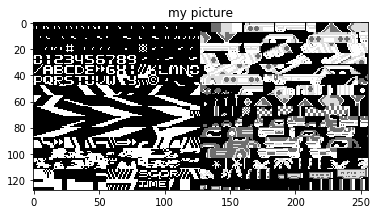

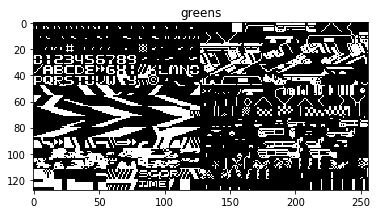

In [9]:
plt.imshow(GRAY_img, cmap='Greys_r')
plt.title('my picture')
plt.show()


_, masked= cv2.threshold(GRAY_img, 250, 255, cv2.THRESH_BINARY)
masked = cv2.bitwise_not(masked)

plt.imshow(masked, cmap="Greys")
plt.title('greens')
plt.show()

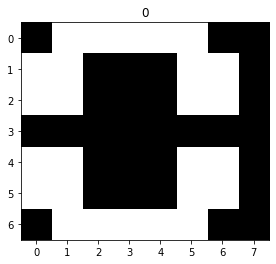

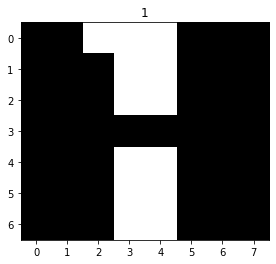

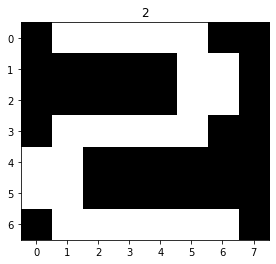

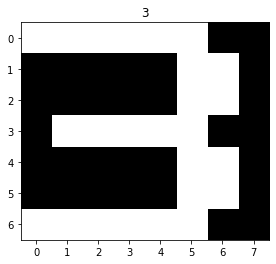

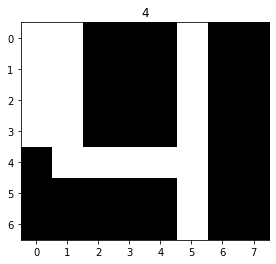

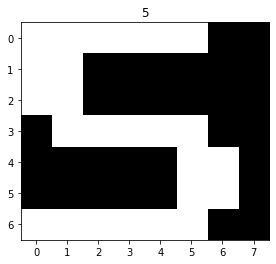

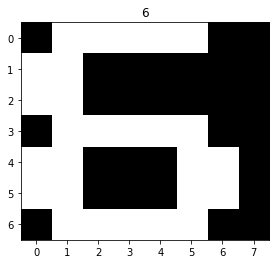

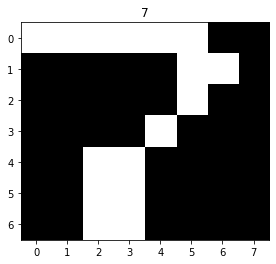

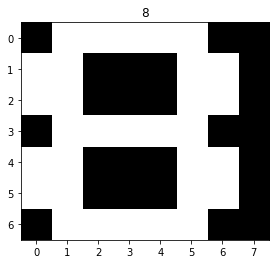

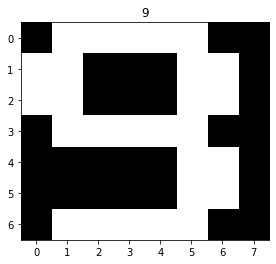

In [14]:
palette_x = 0
digit_images = []
# Digit Images
for digit in range(10):
    origin_palette_x = palette_x + 8 * digit
    digit_images.append(
        masked[25:32, origin_palette_x:origin_palette_x+8]
    )
for i, digit_image in enumerate(digit_images):
    plt.imshow(digit_image, cmap="Greys")
    plt.title(f"{i}")
    plt.show()


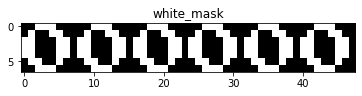

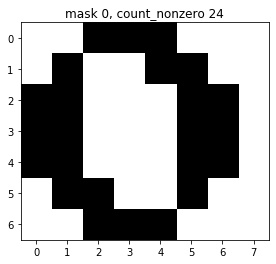

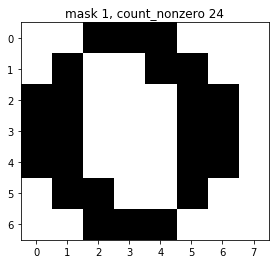

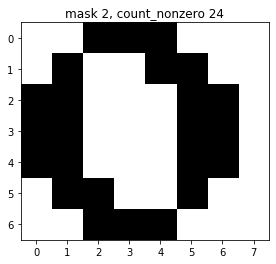

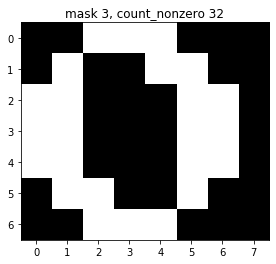

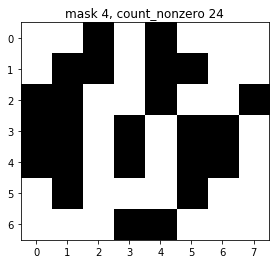

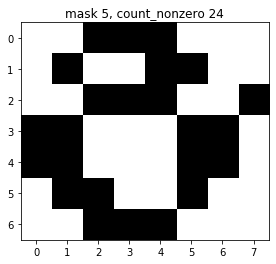

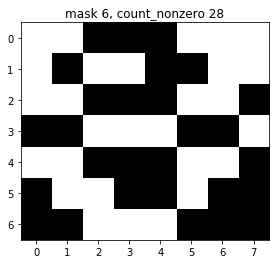

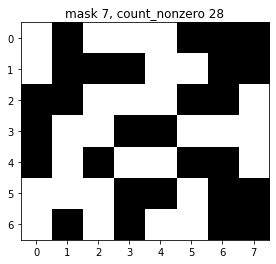

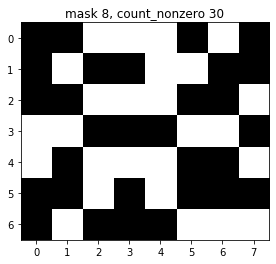

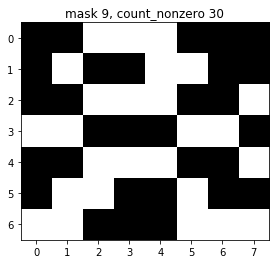

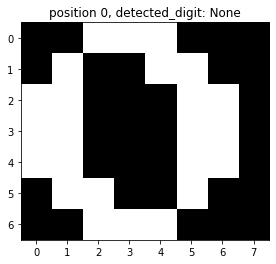

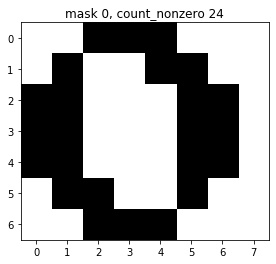

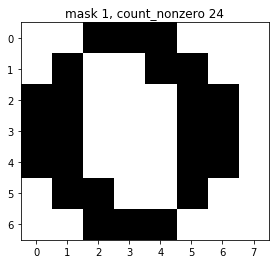

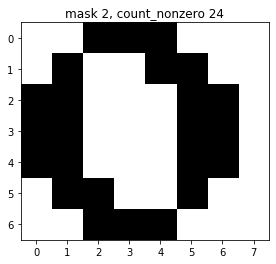

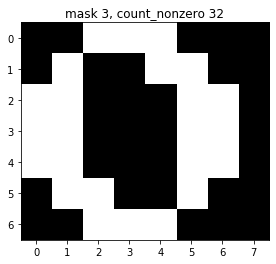

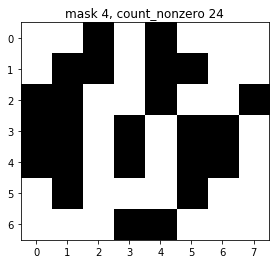

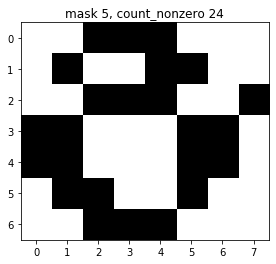

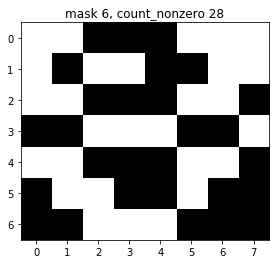

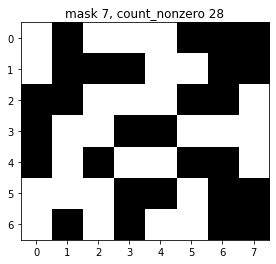

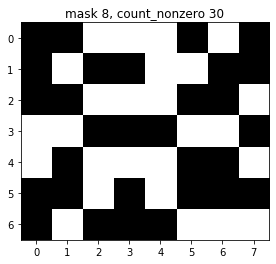

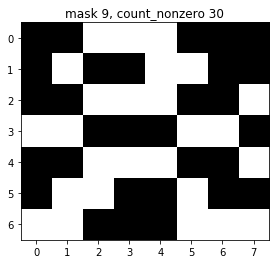

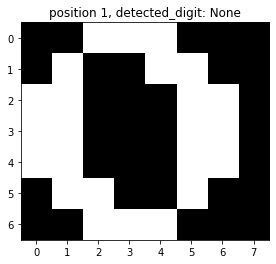

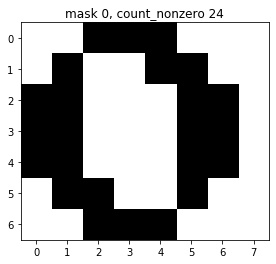

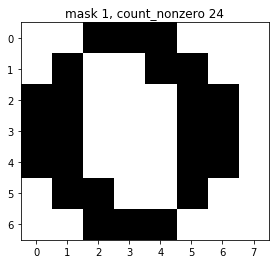

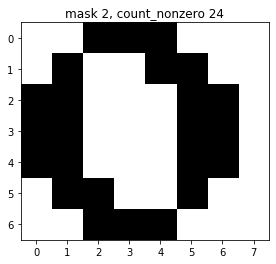

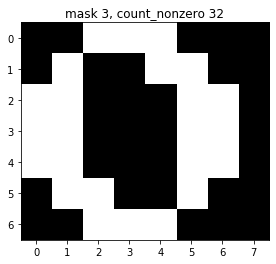

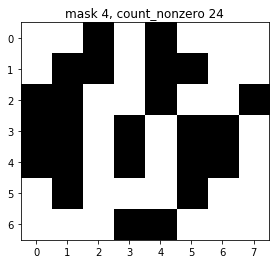

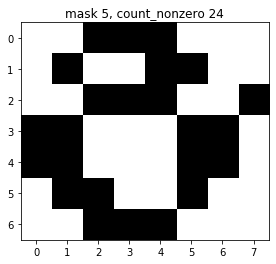

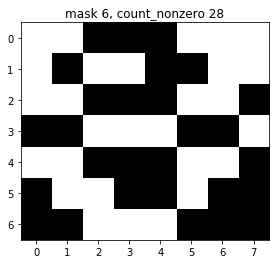

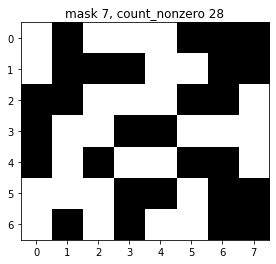

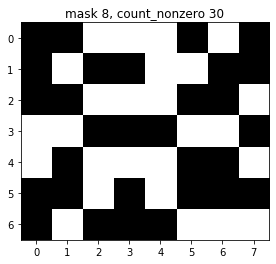

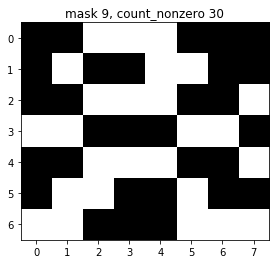

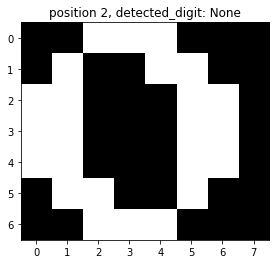

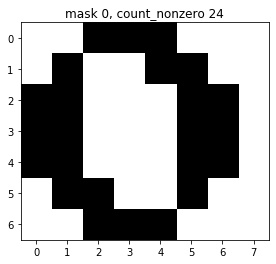

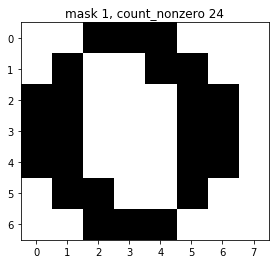

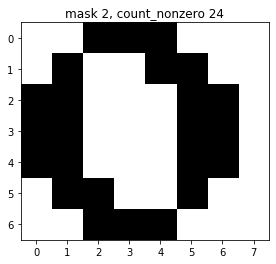

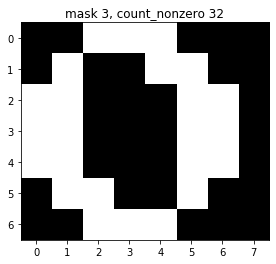

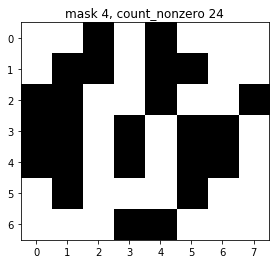

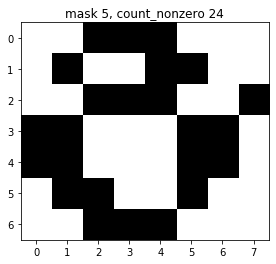

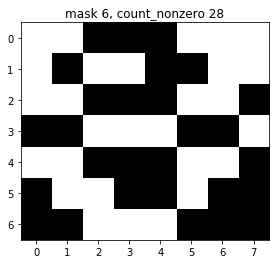

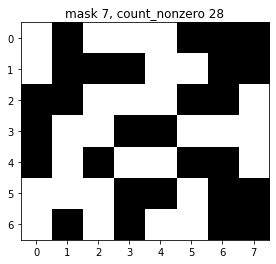

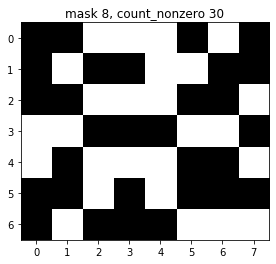

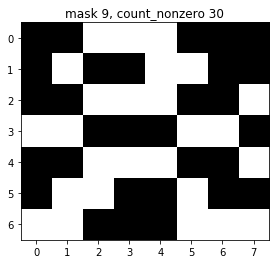

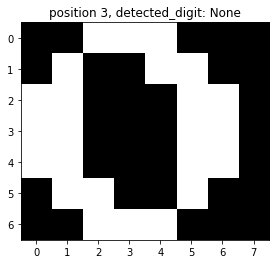

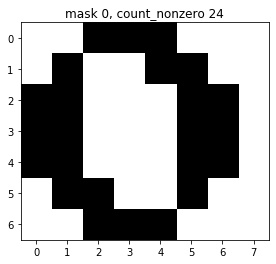

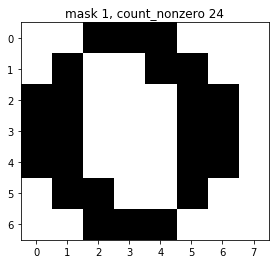

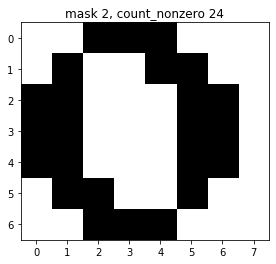

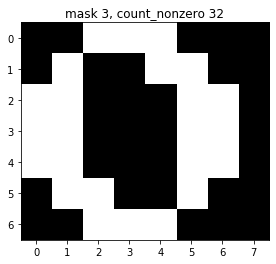

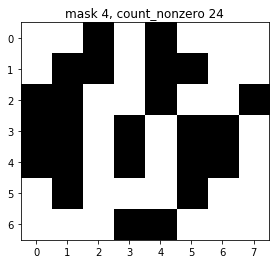

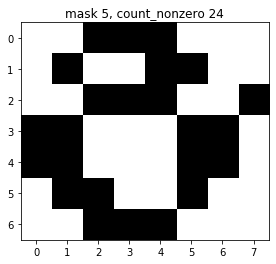

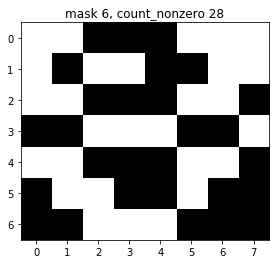

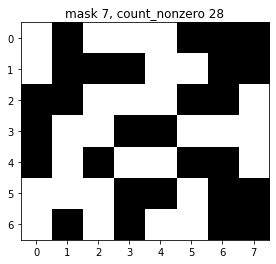

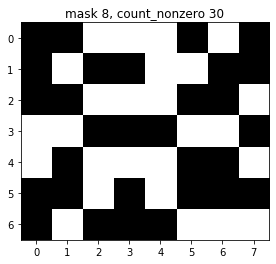

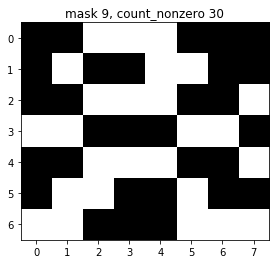

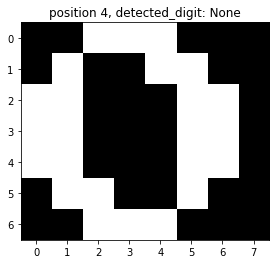

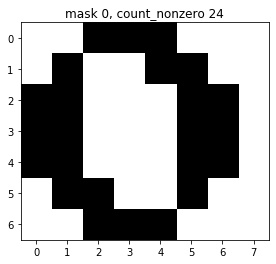

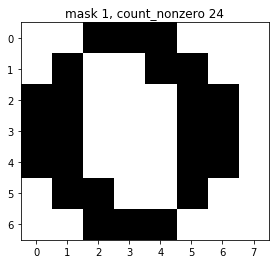

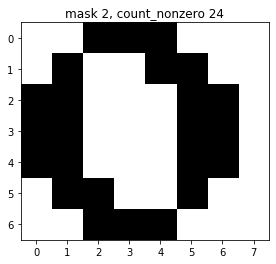

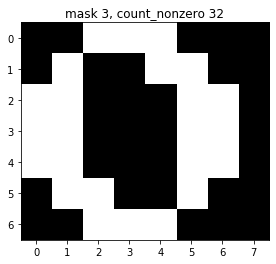

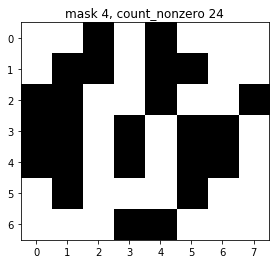

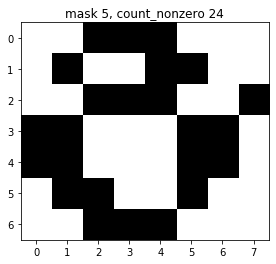

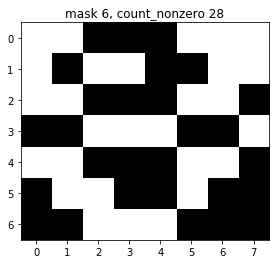

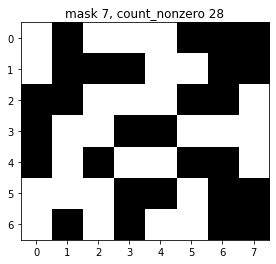

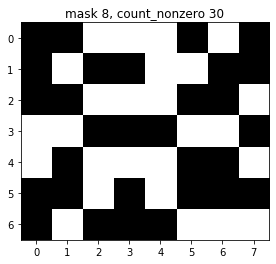

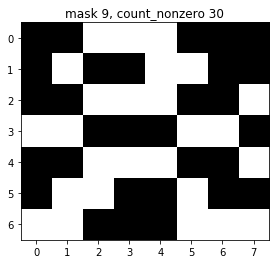

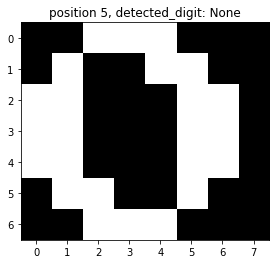

In [11]:
snap_img = cv2.imread('samples/snap_762.png')
HSV_snap_img = cv2.cvtColor(snap_img, cv2.COLOR_BGR2HSV)
# 32, 23

cropped_image_hsv = HSV_snap_img[16:23, 24:72]
lower_white = np.array([0, 0, 250])
upper_bound = np.array([10, 10, 255])

white_mask = cv2.inRange(cropped_image_hsv, lower_white, upper_bound)
white_mask = cv2.bitwise_not(white_mask)

cropped_white_mask = white_mask[16:23, 24:72]

plt.imshow(white_mask, cmap="Greys")
plt.title(f"white_mask")
plt.show()

for i in range(6):
    cropped_digit = white_mask[0:7, 0+i*8:8+i*8]
    detected_digit = None
    for num, digit_image in enumerate(digit_images):
        xor_mask = cv2.bitwise_xor(cropped_digit, digit_image)
        count_nonzero = np.count_nonzero(xor_mask)
        plt.imshow(xor_mask, cmap="Greys")
        plt.title(f"mask {num}, count_nonzero {count_nonzero}")
        plt.show()
        if count_nonzero < 10:
            detected_digit = num


    plt.imshow(cropped_digit, cmap="Greys")
    plt.title(f"position {i}, detected_digit: {detected_digit}")
    plt.show()
